# ECE 285 IVR Assignment #5 - Fourier Transform

## Arik Horodniceanu A53285765

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.fft as npf
import matplotlib
import matplotlib.pyplot as plt
import time
import imagetools.assignment5 as im
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1 Spectral Analysis

Note I zoomed in on the FT to clear up explanations.

### 1

<IPython.core.display.Javascript object>


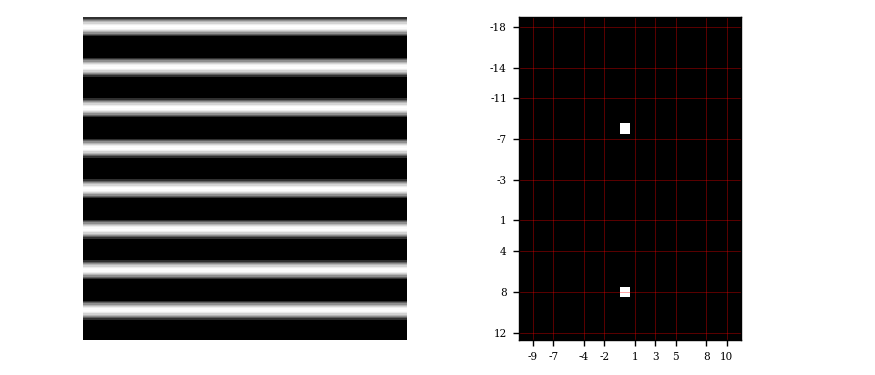

In [189]:
n = 256
i = np.arange(n)
j = np.pi / 16 * np.ones(n)
x = np.sin(np.outer(i, j))
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(x, ax=axes[0])
im.showfft(x, ax=axes[1], apply_fft=True)
fig.show()

The FT of a sine is 2 symmetric deltas (around 0) with same amplitude (different signs, doesn't show here since the absolute value is plotted) at 16/2 from the $\frac{\pi}{16}$ in the frequency of the sine. The deltas are on the orthogonal axis to the sine. On the other axis the sine is 0, so the FT is 0.

### 2

<IPython.core.display.Javascript object>


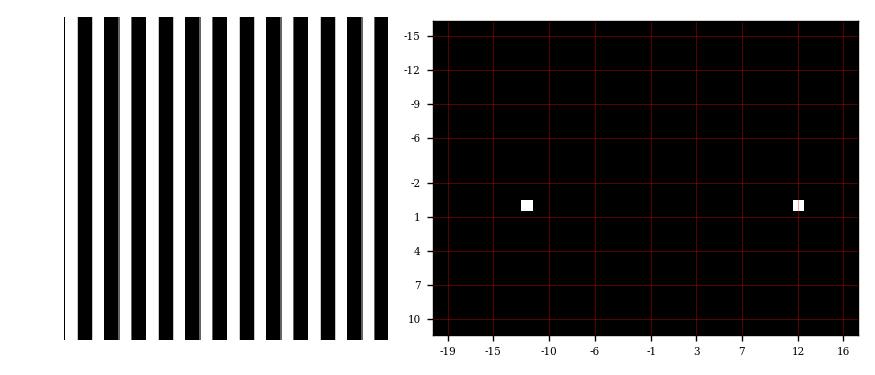

In [188]:
i2 = 2 * np.pi * 3 / 64 * np.ones(n)
j2 = np.arange(n)
x = 4 * np.sin(np.outer(i2, j2))
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(x, ax=axes[0])
im.showfft(x, ax=axes[1], apply_fft=True)
fig.show()

Same thing as before, different frequency now and around horizontal axis and not vertical because of the rotated sine. Also brighter because of higher amplitude.

<IPython.core.display.Javascript object>


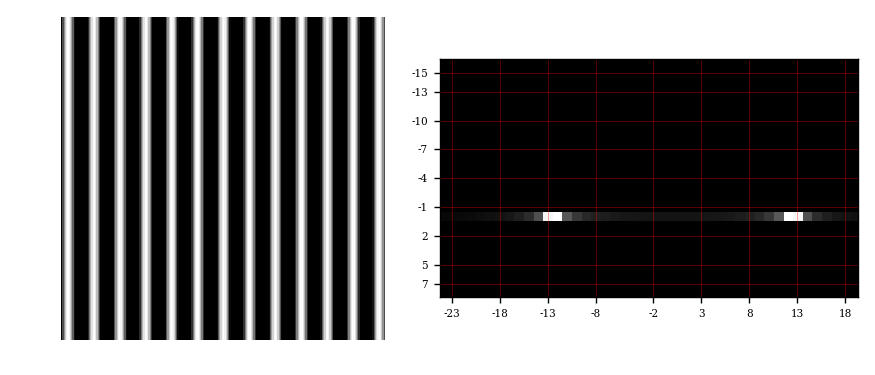

In [19]:
i3 = 2 * np.pi * (3 + 1/8) / 64 * np.ones(256)
x = np.sin(np.outer(i3, j2))
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(x, ax=axes[0])
im.showfft(x, ax=axes[1], apply_fft=True)
fig.show()

Same as before, only shifted. Shift in time domain corresponds to modulation in frequency domain, which is why the "deltas" are not really deltas, but decay exponentially.

<IPython.core.display.Javascript object>


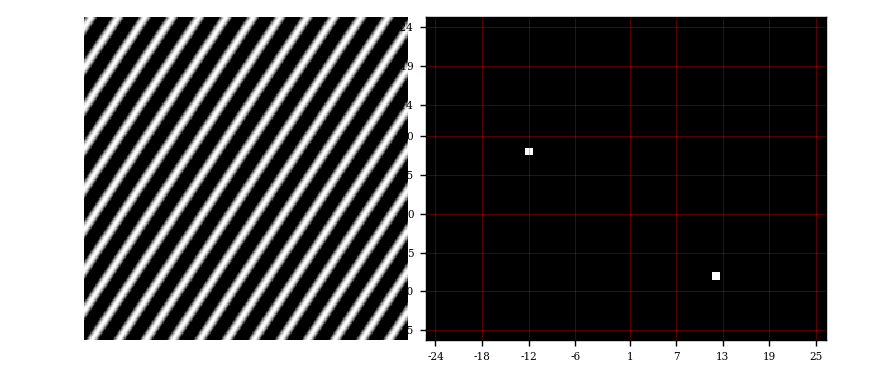

In [20]:
x = np.sin(np.outer(i, j) + np.outer(i2, j2))
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(x, ax=axes[0])
im.showfft(x, ax=axes[1], apply_fft=True)
fig.show()

Same as 2 sections ago, only rotated corresponding the rotation of the sine around axis. Delta are orthogonal to the direction of sines.

<IPython.core.display.Javascript object>


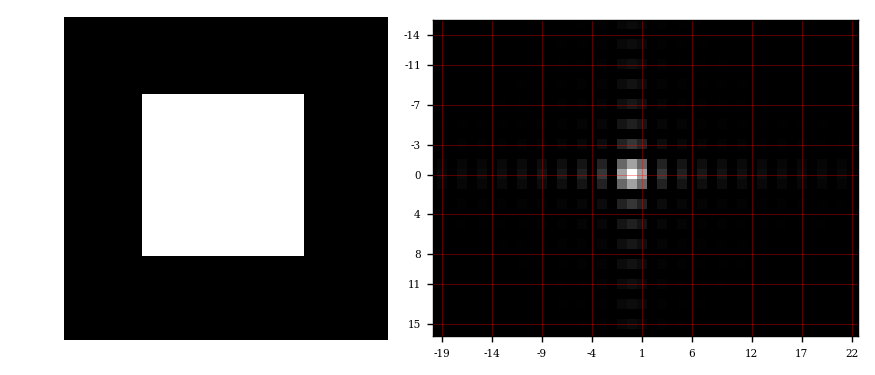

In [22]:
x = np.zeros((256, 256))
x[62:190, 62:190] = 1
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(x, ax=axes[0])
im.showfft(x, ax=axes[1], apply_fft=True)
fig.show()

As explained in class, the fourier transform of a box is a (2D) sinc, which can be seen on the right. The 0 frequency is in the middle, and the wave decays like a sinc in both horizontal and vertical directions, seen by the decreasing amplitude.

<IPython.core.display.Javascript object>


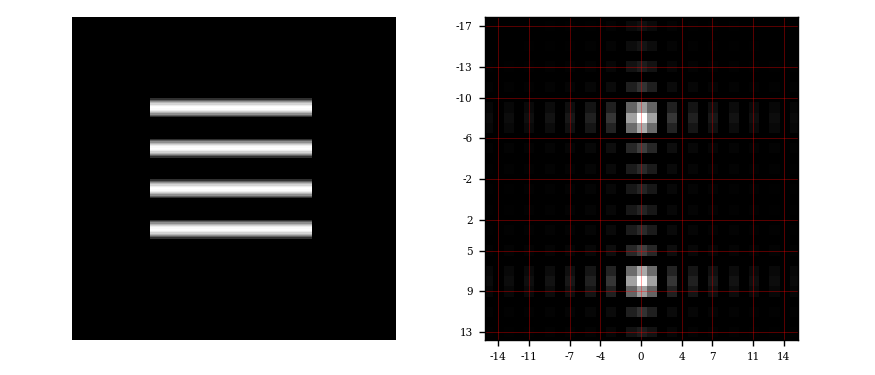

In [23]:
x = x * np.sin(np.outer(i, j))
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(x, ax=axes[0])
im.showfft(x, ax=axes[1], apply_fft=True)
fig.show()

Multiplying with a box in the time domain corresponds to convolving with a sinc in the frequency domain, which can be see as 2 symmetric sincs where the deltas (from the FT of sine) are. As convolving with delta is a shift, we have 2 shifted sincs in the frequencies. Their amplitudes decay as sincs where the deltas are.

### 3

<IPython.core.display.Javascript object>


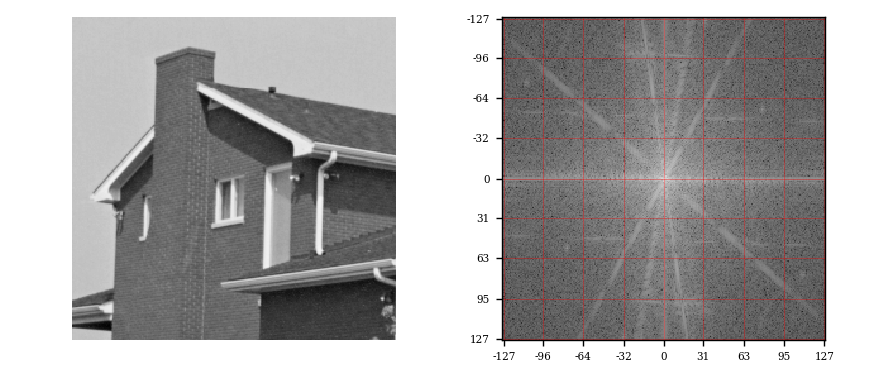

In [22]:
x = plt.imread('assets/house.png')
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(x, ax=axes[0])
im.showfft(x, ax=axes[1], apply_fft=True, apply_log=True)
fig.show()

The FT shows horizontal lines which correspond to strong edges in the orthogonal direction. Mostly the lines from the roof and the lower roof, creating distinct high amplitude lines. This image doesn't have many changes like the next ones, so there aren't many peaks in the higher frequencies.

### 4

<IPython.core.display.Javascript object>


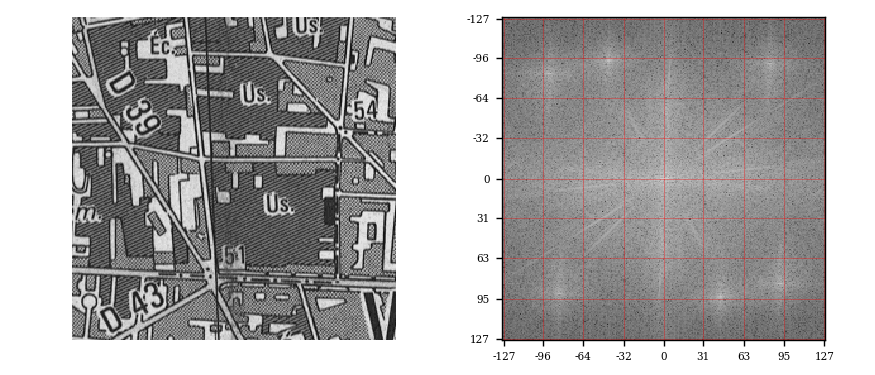

In [25]:
x = plt.imread('assets/map.png')
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(x, ax=axes[0])
im.showfft(x, ax=axes[1], apply_fft=True, apply_log=True)
fig.show()

This image shows more lines, but mostly horizontal and vertical which is why there are lines on the axis in the FT. This image also has higher frequency components because of the changes in texture, which corresponds to the bright spots in the FT. The lines correspond to the lines (edges) in the image, in the orthogonal direction.

<IPython.core.display.Javascript object>


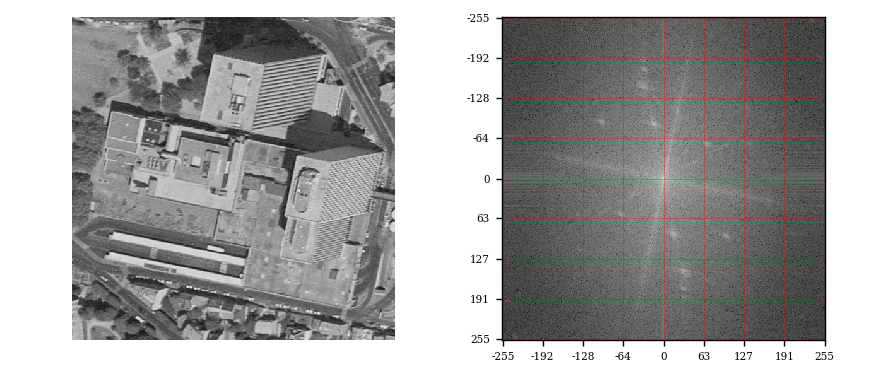

In [26]:
x = plt.imread('assets/montreuil.png')
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(x, ax=axes[0])
im.showfft(x, ax=axes[1], apply_fft=True, apply_log=True)
fig.show()

This image has mostly 2 strong edgs (under the upper building corresponding to the almost horizontal one and in the middle corresponding to the orthogonal). Brighter image so FT darker. There are just a few areas of higher frequency on the buildings, which correspond to the points in the FT. Rest of high frequency is zero because image is mostly lower frequency.

<IPython.core.display.Javascript object>


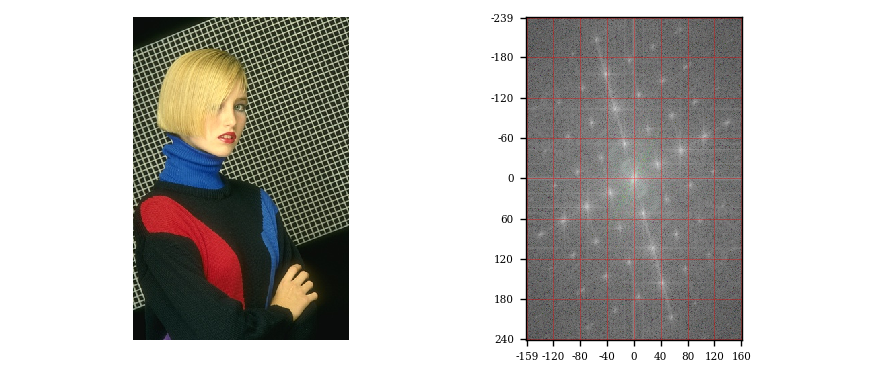

In [27]:
x = plt.imread('assets/lady.png')
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(x, ax=axes[0])
im.showfft(x, ax=axes[1], apply_fft=True, apply_log=True)
fig.show()

This image as lots of darker spots because of the grid in the background, corresponding to high frequency bright spots in FT. Also mostly 2 edges because of BG and horizontal edge caused by the woman\bg contrast.

### 5

<IPython.core.display.Javascript object>


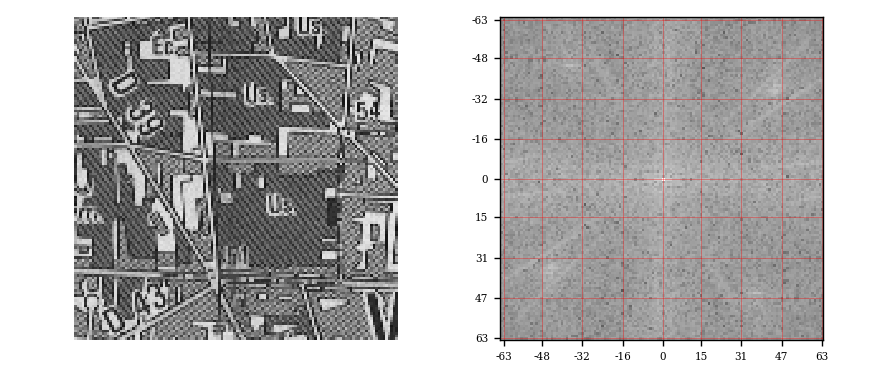

In [33]:
x = plt.imread('assets/map.png')
x = x[::2, ::2]
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(x, ax=axes[0])
im.showfft(x, ax=axes[1], apply_fft=True, apply_log=True)
fig.show()

Downsampling in the time domain corresponds to taking shifted (with 1/N amplitude, where N is the downsample rate) copies of the FT. In this case, since the image has a lot of changes in color, it is high frequency and so aliasing has much impact on the FT. As such, the FT loses most of the peaks and it is almost constant, with some small residuals of edges visible in high frequency.

<IPython.core.display.Javascript object>


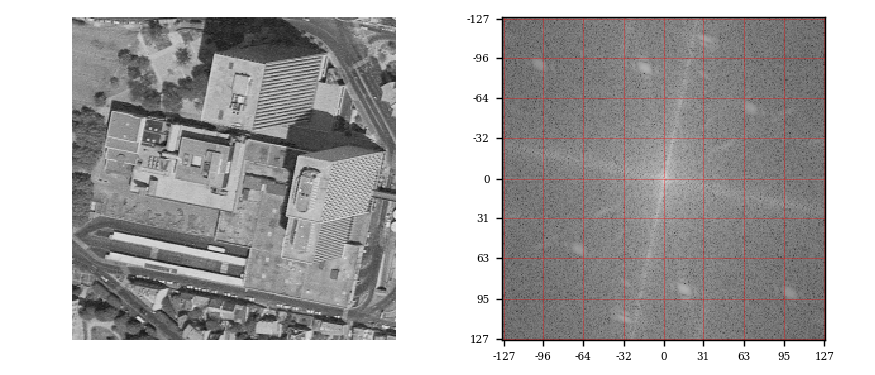

In [35]:
x = plt.imread('assets/montreuil.png')
x = x[::2, ::2]
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(x, ax=axes[0])
im.showfft(x, ax=axes[1], apply_fft=True, apply_log=True)
fig.show()

This image is not very high-frequency dominant and so most peaks and edges are preserved in the FT. The areas that were previously high frequency most remain the same here in the FT. We will see next that downsampling by 4 violates the Nyquist-Shannon condition for this image.

<IPython.core.display.Javascript object>


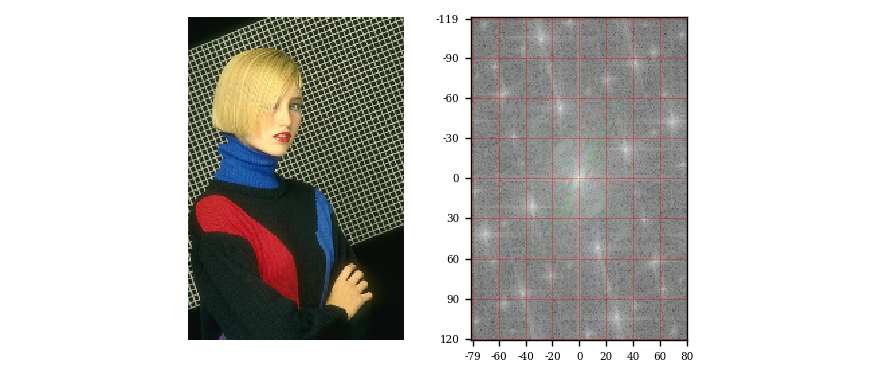

In [34]:
x = plt.imread('assets/lady.png')
x = x[::2, ::2]
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(x, ax=axes[0])
im.showfft(x, ax=axes[1], apply_fft=True, apply_log=True)
fig.show()

Here, we can see that there are less peaks in the FT compared to the regular version, meaning there is some aliasing occuring. Not as much as for the first image, indicating that the Shannon-Nyquist condition is not violated by much. We can notice that the pattern in the BG which contributed to the high frequency peaks in not so high frequency here, which is why there are less peaks.

<IPython.core.display.Javascript object>


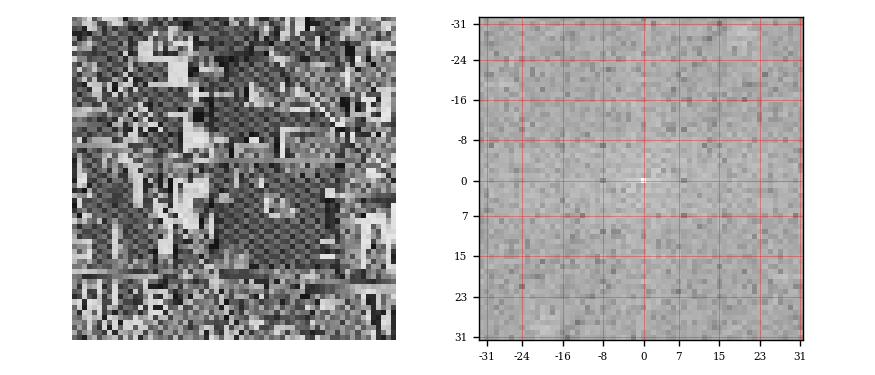

In [36]:
x = plt.imread('assets/map.png')
x = x[::4, ::4]
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(x, ax=axes[0])
im.showfft(x, ax=axes[1], apply_fft=True, apply_log=True)
fig.show()

As expected, if for downsampling by 2 there was much loss, when downsampling by 4 this image is pretty much destroyed, and so its FT looks almost like noise.

<IPython.core.display.Javascript object>


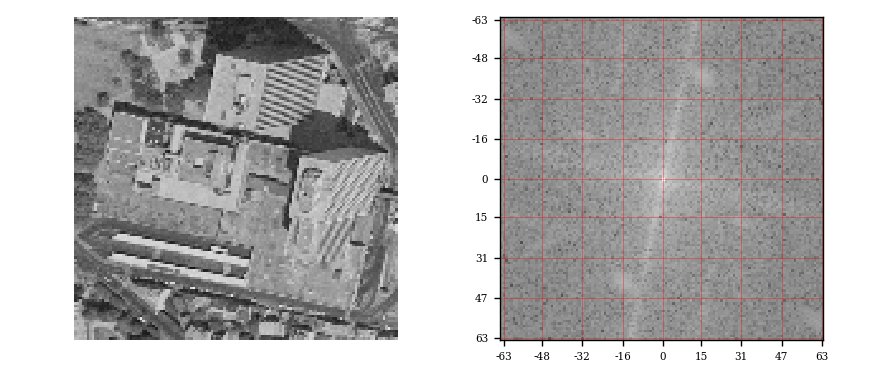

In [37]:
x = plt.imread('assets/montreuil.png')
x = x[::4, ::4]
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(x, ax=axes[0])
im.showfft(x, ax=axes[1], apply_fft=True, apply_log=True)
fig.show()

Now for this image the Nyquist-Shannon condition has been violated, so most details are lost from the FT, except for the large horizontal edge below the roof, which corresponds to the vertical line in the FT. The lines on the buildings are not so high frequency as before, which is why the bright points in the FT are mostly gone

<IPython.core.display.Javascript object>


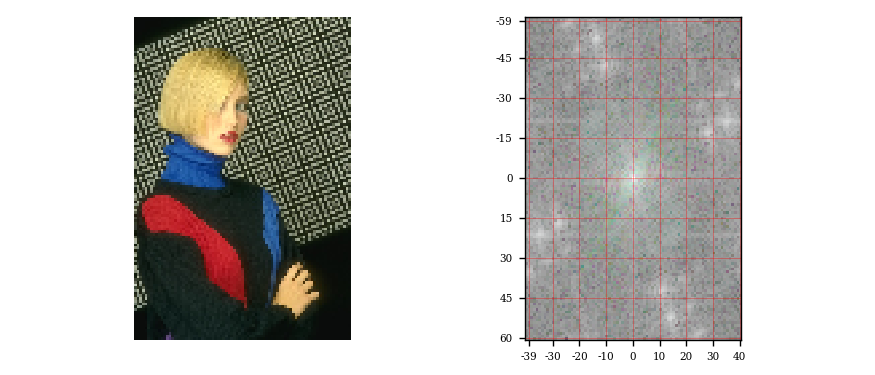

In [38]:
x = plt.imread('assets/lady.png')
x = x[::4, ::4]
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(x, ax=axes[0])
im.showfft(x, ax=axes[1], apply_fft=True, apply_log=True)
fig.show()

Now there is more aliasing which makes the pattern in the background less distinct, so the FT shows less peaks. There are still some, which correspond to the differences in the time domain image.

## 2 Spectral Convolution

### 6

<IPython.core.display.Javascript object>


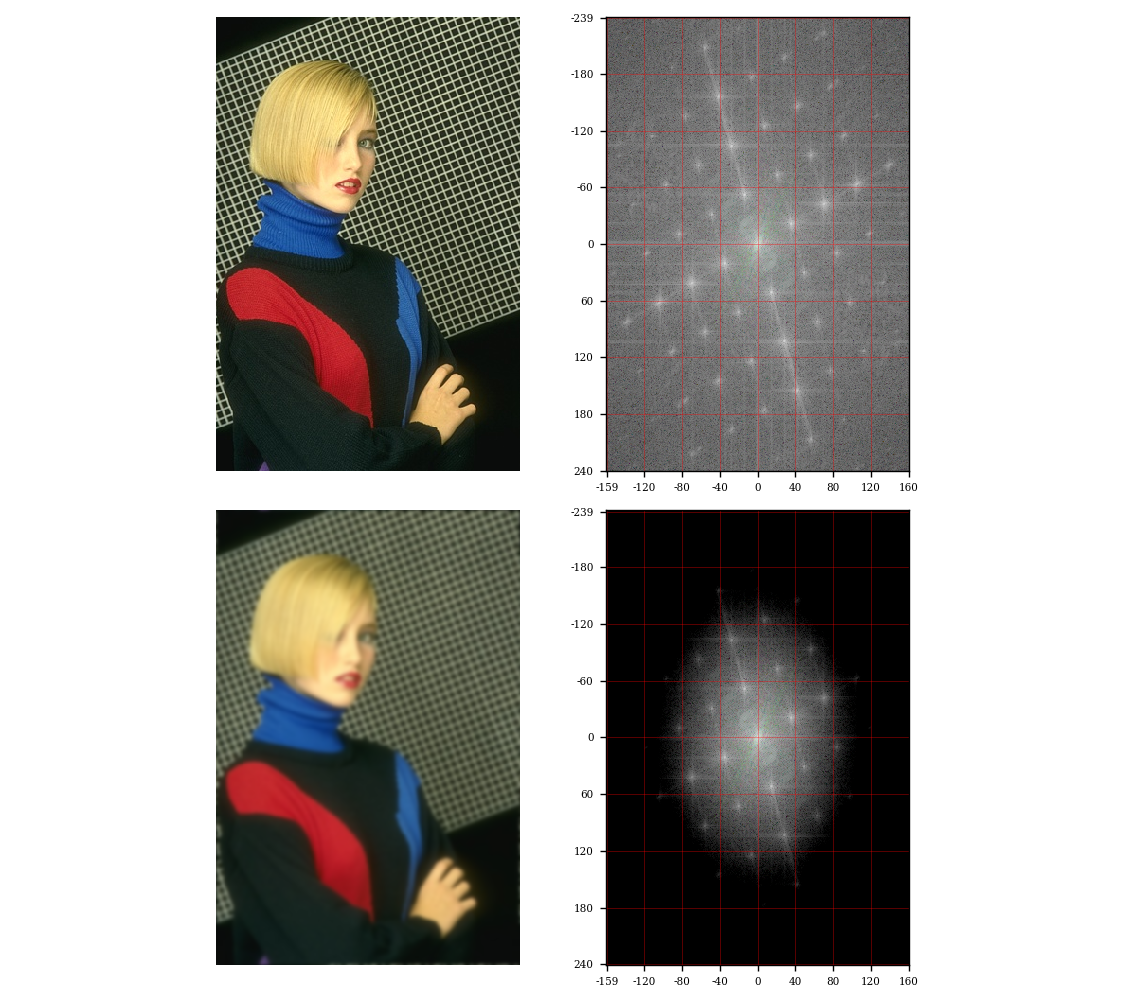

In [12]:
x = plt.imread('assets/lady.png')
nu = im.kernel('gaussian',tau=2)
y = im.convolve(x,nu)
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(9,8))
im.show(x, ax=axes[0,0])
im.showfft(x, ax=axes[0,1], apply_fft=True, apply_log=True)
im.show(y, ax=axes[1,0])
im.showfft(y, ax=axes[1,1], apply_fft=True, apply_log=True)
fig.show()

Convolving with a gaussian = blur (also multiplying by gaussian in frequency domain), means losing edges, which corresponds to removing the high frequencies in the frequency domain. Indeed, the spectrum shows that the large frequencies are 0 (black), since it is centered. The FT is multiplied by a gaussian (FT{gaussian}=gaussian), so it decays very quickly outside the lower frequencies (like $e^{-t^2}$). This matches what was taught in class, basically a low pass filter.

### 7

<IPython.core.display.Javascript object>


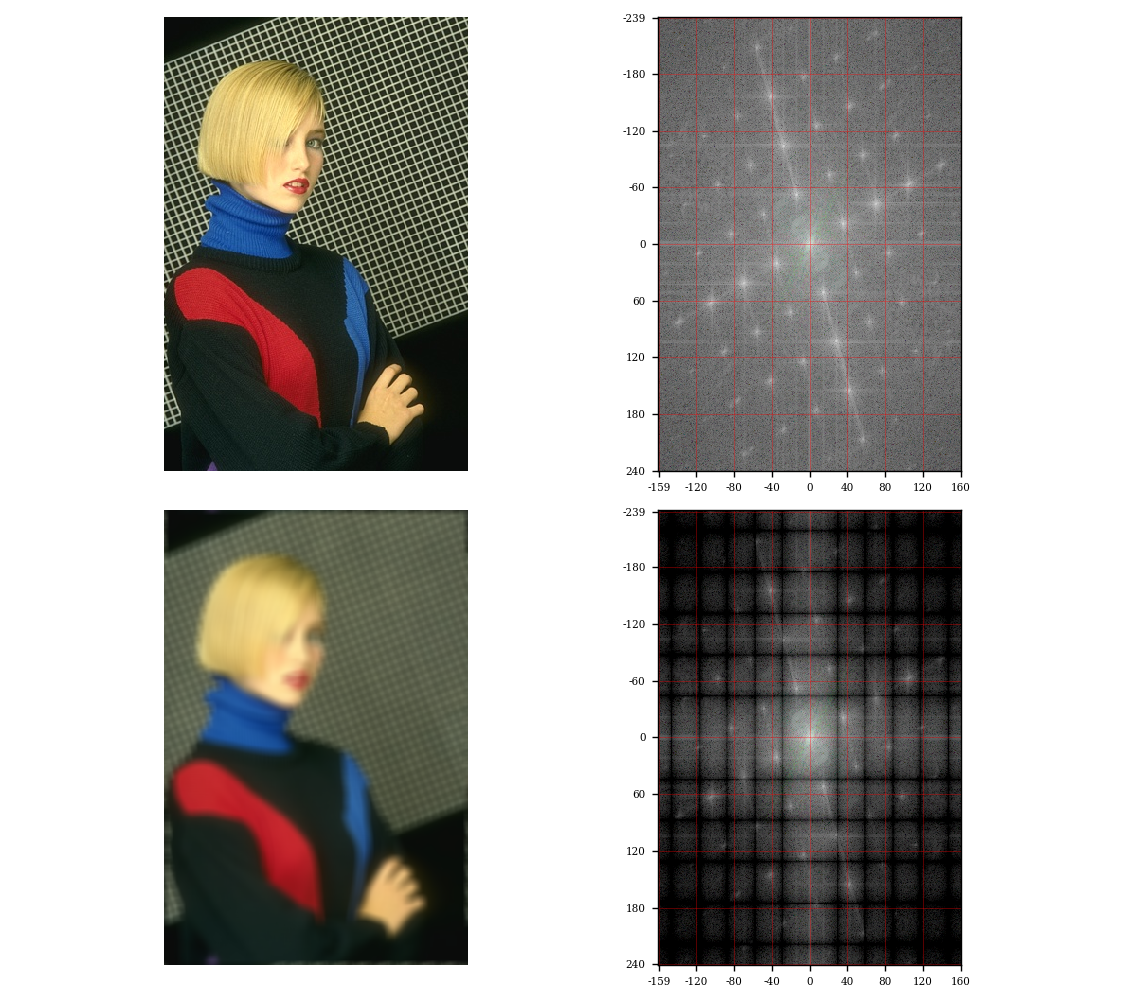

In [4]:
x = plt.imread('assets/lady.png')
nu = im.kernel('box',tau=5)
y = im.convolve(x,nu)
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(9,8))
im.show(x, ax=axes[0,0])
im.showfft(x, ax=axes[0,1], apply_fft=True, apply_log=True)
im.show(y, ax=axes[1,0])
im.showfft(y, ax=axes[1,1], apply_fft=True, apply_log=True)
fig.show()

Multiplying in the frequency domain by a sinc, shows the pattern of decay of the FT in both directions. Also can see the "boxy" patterns in the FT because of the zeros of the sinc in both axes. The peaks are mostly preserved in the horizontal and vertical directions in low frequencies. In diagonal directions much higher attenuation.

### 8

In [159]:
# Same function as in assignment5.py
def kernel2fft(nu, n1, n2, separable=None):
    
    if (separable==None):
        s1 = int((nu.shape[0] - 1) / 2)
        s2 = int((nu.shape[1] - 1) / 2)
        # zero pad
        tmp = np.zeros((n1, n2))
        # fft "shift"
        tmp[:s1+1, :s2+1] = nu[s1:2*s1+1, s2:2*s2+1] # upper left - blue
        tmp[n1-s1:n1, n2-s2:] = nu[ :s1, :s2] # bottom right - red
        tmp[:s1+1,n2-s2:] = nu[s1:2*s1+1,:s2] # upper right - green
        tmp[n1-s1:,:s2+1] = nu[:s1,s2:2*s2 +1] # bottom left - yellow
        # fft
        lbd = npf.fft2(tmp)
        
    elif (separable is 'sum'):
        lbd = kernel2fft(nu[0],n1,n2) + kernel2fft(nu[1],n1,n2)
    elif (separable is 'product'):
        lbd = kernel2fft(nu[0],n1,n2)*kernel2fft(nu[1],n1,n2)
        
    return lbd

### 9

In [160]:
# Same function as in assignment5.py
def convolvefft(x, lbd):
    # Convolution in the time domain = product in frequency domain
    lbd = np.expand_dims(lbd,axis=2) # for product in frequency
    xfft = npf.fft2(x, axes=(0, 1))
    result = xfft*lbd
    return np.real(npf.ifft2(result, axes=(0, 1)))

### 10

<IPython.core.display.Javascript object>


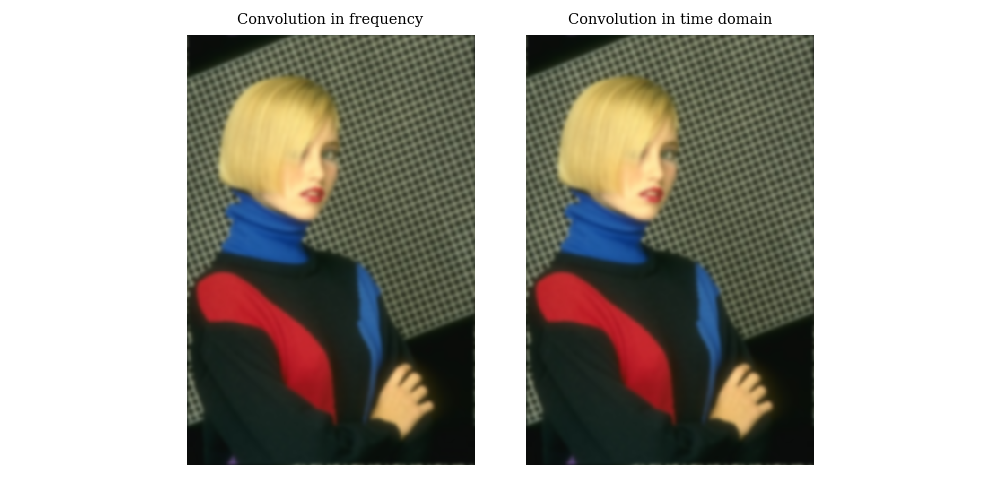

True

In [136]:
x = plt.imread('assets/lady.png')
nu = kernel('gaussian',tau=2)
n1,n2 = x.shape[:2]
lbd = kernel2fft(nu,n1,n2)
resF = convolvefft(x,lbd)
y = im.convolve(x,nu)
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
im.show(resF,ax=axes[0])
axes[0].set_title('Convolution in frequency')
im.show(y, ax=axes[1])
axes[1].set_title('Convolution in time domain')
fig.show()
np.allclose(y,resF)

Holds true for convolution with gaussian kernel with tau = 2.

<IPython.core.display.Javascript object>


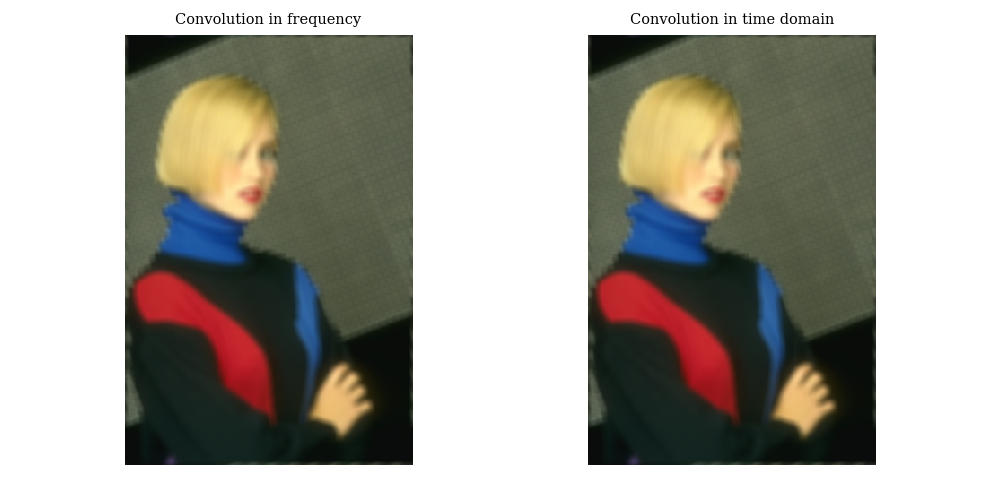

True

In [137]:
x = plt.imread('assets/lady.png')
nu = kernel('box',tau=4)
n1,n2 = x.shape[:2]
lbd = kernel2fft(nu,n1,n2)
resF = convolvefft(x,lbd)
y = im.convolve(x,nu)
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
im.show(resF,ax=axes[0])
axes[0].set_title('Convolution in frequency')
im.show(y, ax=axes[1])
axes[1].set_title('Convolution in time domain')
fig.show()
np.allclose(y,resF)

True for box kernel with tau = 4.

<IPython.core.display.Javascript object>


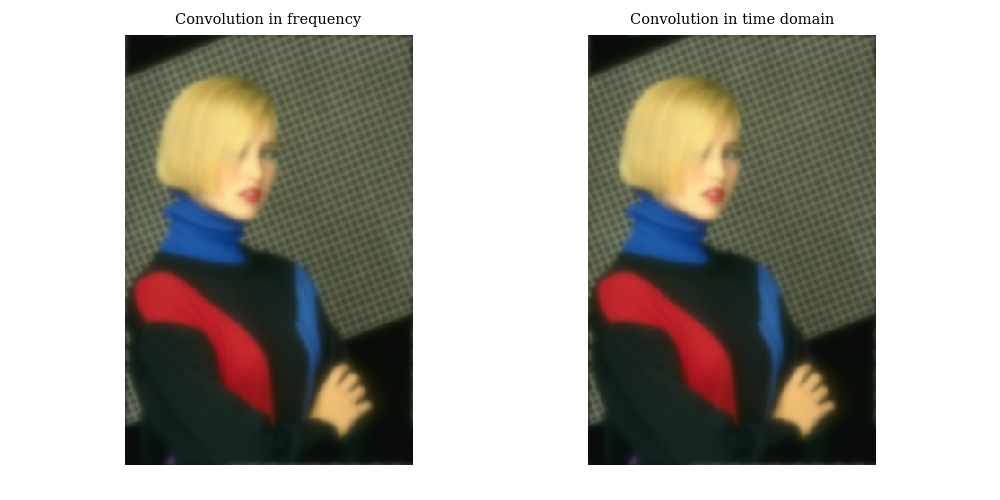

True

In [138]:
x = plt.imread('assets/lady.png')
nu = kernel('exponential',tau=2)
n1,n2 = x.shape[:2]
lbd = kernel2fft(nu,n1,n2)
resF = convolvefft(x,lbd)
y = im.convolve(x,nu)
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
im.show(resF,ax=axes[0])
axes[0].set_title('Convolution in frequency')
im.show(y, ax=axes[1])
axes[1].set_title('Convolution in time domain')
fig.show()
np.allclose(y,resF)

True for exponential kernel with tau = 2. Shows the implementation above is right.

### 11

<IPython.core.display.Javascript object>


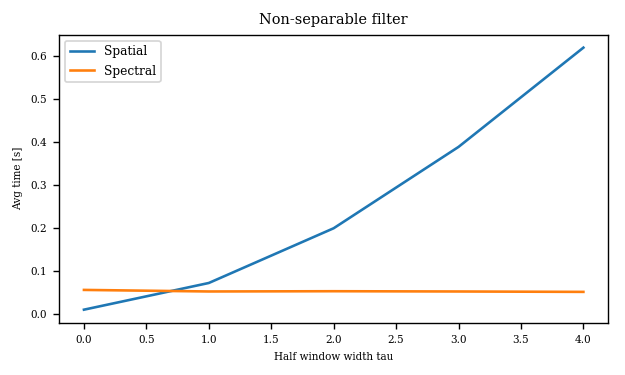

In [152]:
x = plt.imread('assets/lady.png')
n1,n2 = x.shape[:2]
runs = 100
tau_max = 4
tau_arr = np.linspace(0,tau_max,tau_max + 1)
avg_times_spatial = np.linspace(0,tau_max,tau_max + 1)
avg_times_spectral = np.linspace(0,tau_max,tau_max + 1)

# Non separable case
for tau in range(tau_max+1):
    avg_times_spatial[tau] = 0
    avg_times_spectral[tau] = 0
    nu = kernel('box',tau)
    for run in range(runs):
        t1 = time.time()
        y = im.convolve(x,nu)
        t2 = time.time()
        avg_times_spatial[tau] += (t2-t1)
        
        lbd = kernel2fft(nu,n1,n2)
        t1 = time.time()
        yf = convolvefft(x,lbd)
        t2 = time.time()
        avg_times_spectral[tau] += (t2-t1)
        
    avg_times_spatial[tau] /=runs
    avg_times_spectral[tau] /=runs

plt.plot(tau_arr,avg_times_spatial)
plt.plot(tau_arr,avg_times_spectral)
plt.xlabel('Half window width tau')
plt.ylabel('Avg time [s]')
plt.title('Non-separable filter')
plt.legend(['Spatial','Spectral'])
plt.show()

<IPython.core.display.Javascript object>


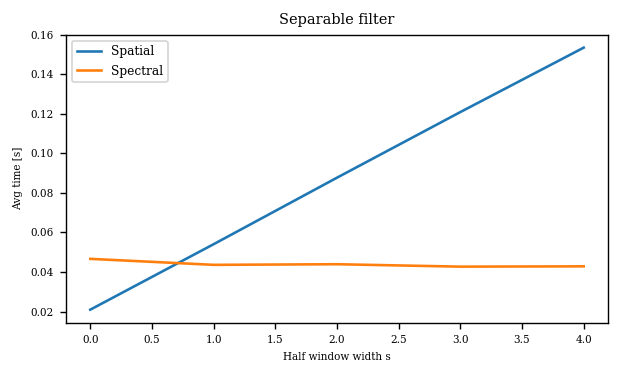

In [161]:
x = plt.imread('assets/lady.png')
n1,n2 = x.shape[:2]
runs = 100
tau_max = 4
tau_arr = np.linspace(0,tau_max,tau_max + 1)
avg_times_spatial = np.linspace(0,tau_max,tau_max + 1)
avg_times_spectral = np.linspace(0,tau_max,tau_max + 1)

# Separable case
for tau in range(tau_max+1):
    avg_times_spatial[tau] = 0
    avg_times_spectral[tau] = 0
    nu1 = kernel('box1',tau)
    nu2 = kernel('box2',tau)
    nu = (nu1,nu2)
    for run in range(runs):
        t1 = time.time()
        y = im.convolve(x,nu,boundary='periodical',separable='product')
        t2 = time.time()
        avg_times_spatial[tau] += (t2-t1)
        
        lbd = kernel2fft(nu,n1,n2,separable='product')
        t1 = time.time()
        yf = convolvefft(x,lbd)
        t2 = time.time()
        avg_times_spectral[tau] += (t2-t1)
        
    avg_times_spatial[tau] /=runs
    avg_times_spectral[tau] /=runs

plt.plot(tau_arr,avg_times_spatial)
plt.plot(tau_arr,avg_times_spectral)
plt.xlabel('Half window width s')
plt.ylabel('Avg time [s]')
plt.title('Separable filter')
plt.legend(['Spatial','Spectral'])
plt.show()

Results are almost identical to the assignment description.
In our case, the kernels have limited support $s$ (or $\tau$). In the non-separable case, the complexity of the convolution in the spatial domain is $O(s^2n)$ and the separable case $O(sn)$, where $n = n_1\times n_2$ and $n_1,n_2$ are the dimensions of the image. The above 2 figures illustrate this, as for the separable case the time requirement increases linearly in $s(=\tau)$ and in the non-separable case the spatial convolution increases quadratically. This is the whole point of separable filters, to separate in each direction and then do the convolution for one direction at a time, since each of those will take $O(sn)$, the complexity will be $O(2sn)=O(sn)$.

In the spectral domain the complexity is $O(nlogn)$. The above 2 graphs show this, since the time requirement of the spectral convolution does not change between the separable and non-separable cases. The time requirement is constant because the parameter $s$ plays no role, as the kernel is padded anyway to the dimensions of the image, $n$.

Also it can be seen that for a very small kernel width, spatial convolution is faster than spectral convolution, likely since there are less multiplications to be made than for calculating the FFT. In any other case ($s\ge 1$), spectral convolution is faster.

## 3 Adjoint

### 12

In [8]:
# Same function as in assignment4.py
def kernel(name, tau=1, eps=1e-3):
    
    # l is derived from the formulas of f()
    if (name.startswith('gaussian')):
        s1, s2 = 0, 0
        s = np.floor(np.sqrt(2*(tau**2)*((-1)*np.log(eps))))
        
        if (name.endswith('1')):
            s1 = s
        elif (name.endswith('2')):
            s2 = s
        else:
            s1, s2 = s, s
        
        ax = np.arange(-s1,s1+1)
        ay = np.arange(-s2,s2+1)
        xx, yy = np.meshgrid(ax, ay, indexing='ij')
        nu = np.exp(-(xx**2 + yy**2) / (2*tau**2))
        nu /= np.sum(nu)
        
    elif (name.startswith('exponential')):
        s1, s2 = 0, 0
        s = np.floor(-1*tau*np.log(eps))
        
        if (name.endswith('1')):
            s1 = s
        elif (name.endswith('2')):
            s2 = s
        else:
            s1, s2 = s, s
            
        ax = np.arange(-s1,s1 +1)
        ay = np.arange(-s2,s2 +1)
        xx, yy = np.meshgrid(ax, ay, indexing='ij')
        nu = np.exp(-np.sqrt(xx**2 + yy**2) / tau)
        nu /= np.sum(nu)
        
    elif (name.startswith('box')):
        s = 2*tau + 1
        if (name.endswith('1')):
            nu = np.ones((s, 1))
            
        elif (name.endswith('2')):
            nu = np.ones((1,s))
            
        else:
            nu = np.ones((s,s))
            
        nu/= np.sum(nu) 
    
    # Definition from lecture slides
    elif name is 'grad1_forward':
        nu = np.zeros((3, 1))
        nu[1,0] = -1
        nu[2,0] = 1
    elif name is 'grad1_backward':
        nu = np.zeros((3, 1))
        nu[0,0] = -1
        nu[1,0] = 1
    elif name is 'grad2_forward':
        nu = np.zeros((1, 3))
        nu[0, 1] = -1
        nu[0, 2] = 1
    elif name is 'grad2_backward':
        nu = np.zeros((1, 3))
        nu[0, 1] = 1
        nu[0, 0] = -1
    elif name is 'laplacian1':
        nu = np.zeros((3, 1))
        nu[0, 0] = nu[2, 0] = 1
        nu[1, 0] = -2
    elif name is 'laplacian2':
        nu = np.zeros((1, 3))
        nu[0, 0] = nu[0, 2] = 1
        nu[0, 1] = -2
    elif name is 'motion':
        nu = np.load('assets/motionblur.npy')
    else:
        print('Error: Kernel not defined. Returning box kernel.')
        nu = kernel('box',tau,eps)
    return nu

### 13

<IPython.core.display.Javascript object>


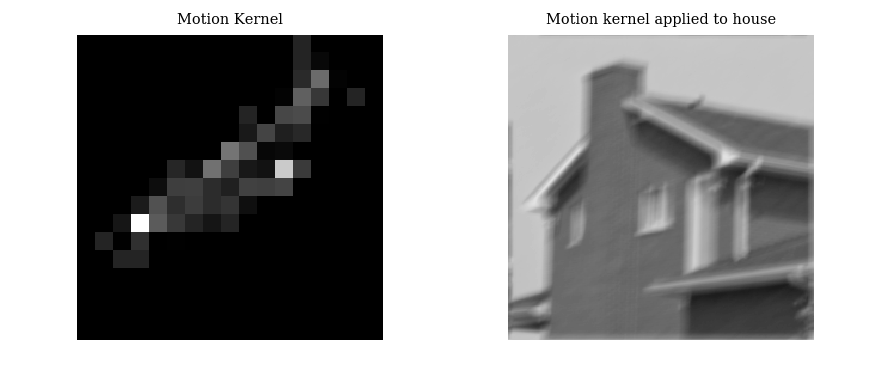

In [162]:
nu = kernel('motion')
x = plt.imread('assets/house.png')
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im.show(nu, ax=axes[0],vmin=nu.min(),vmax=nu.max())
axes[0].set_title('Motion Kernel')
im.show(im.convolve(x,nu), ax=axes[1])
axes[1].set_title('Motion kernel applied to house')
fig.show()

### 14

In [175]:
x = plt.imread('assets/house.png')
y = plt.imread('assets/map.png')
nu1 = kernel('motion')
nu2 = kernel('gaussian')

# Conjugate kernels
nu1h = np.flip(nu1,0)
nu1h = np.flip(nu1h,1)
nu2h = np.flip(nu2,0)
nu2h = np.flip(nu2h,1)

# Check for motion kernel
LHS1 = im.convolve(x,nu1)
LHS = np.sum(LHS1*y)
RHS1 = im.convolve(y,nu1h)
RHS = np.sum(x*RHS1)
print(np.isclose(RHS,LHS))

# Check for gaussian kernel
LHS1 = im.convolve(x,nu2)
LHS = np.sum(LHS1*y)
RHS1 = im.convolve(y,nu2h)
RHS = np.sum(x*RHS1)
print(np.isclose(RHS,LHS))


True
True


Works for both gaussian and motion kernels. Will work for any kernel.
The adjoint of the convolution operator is the cross correlation. $\mu(x,y) = \nu(-x,-y)$. Essentially the matrix $\mu$ is a flipped (in both directions) version of $\nu$.

### 15

In [186]:
x = plt.imread('assets/house.png')
y = plt.imread('assets/map.png')
n1,n2 = x.shape[:2]
nu1 = kernel('motion')
nu1f = kernel2fft(nu1,n1,n2)
nu1s = np.conjugate(kernel2fft(nu1,n1,n2))

nu2 = kernel('gaussian')
nu2f = kernel2fft(nu2,n1,n2)
nu2s = np.conjugate(kernel2fft(nu2,n1,n2))

# motion kernel
LHS1 = convolvefft(x,nu1f)
LHS = np.sum(LHS1*y)
RHS1 = convolvefft(y,nu1s)
RHS = np.sum(x*RHS1)
print(np.isclose(RHS,LHS))

# gaussian kernel
LHS1 = convolvefft(x,nu2f)
LHS = np.sum(LHS1*y)
RHS1 = convolvefft(y,nu2s)
RHS = np.sum(x*RHS1)
print(np.isclose(RHS,LHS))

True
True


Again, true for both kernels, will be true for any. Taking the fourier transform of a cross correlation is equivalent to taking the fourier transform of the complex conjugate of one, then multiplying by the fourier transform of the other. The frequency response of $\mu$ is the complex conjugate of the frequency response of $\nu$.